In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("Mall_Customers.csv")

# Show first rows
df.head()



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Select Features for Clustering
X = df.iloc[:, [3,4]].values    # column 3 Annual Income and column 4 Spending Score

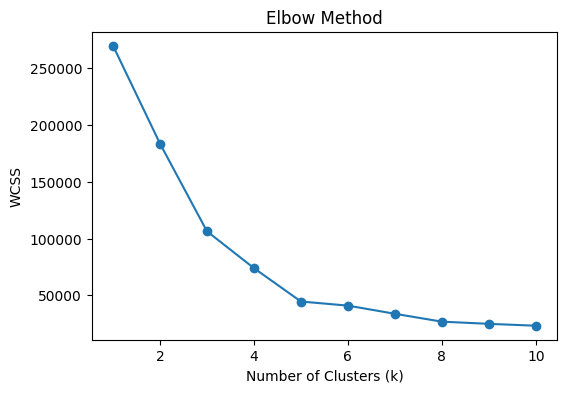

In [8]:
# Find Optimal K (Elbow Method)
# Elbow Method to find optimal K

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()


In [10]:
# Apply K-Means with k=5
kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


# Add cluster labels to dataset
df['Cluster'] = y_kmeans
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


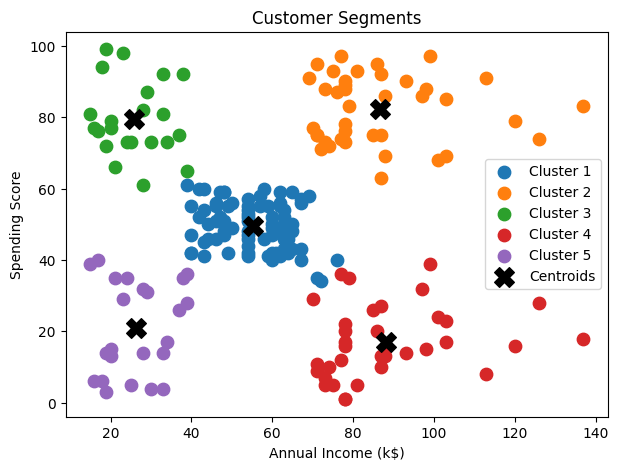

In [11]:
#  Visualizing the clusters
plt.figure(figsize=(7,5))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=80, label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=80, label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=80, label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=80, label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=80, label='Cluster 5')

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:,0], 
    kmeans.cluster_centers_[:,1],
    s=200, marker='X', c='black', label='Centroids'
)

plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.legend()
plt.show()


In [12]:
#  Analyze clusters
cluster_summary = df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
cluster_summary


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043
